In [125]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
import math as m

np.random.seed(521)

In [478]:
df = pd.read_csv('Project_1_Clean.csv', index_col = 0)
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release,Good
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,11.0,1
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,9.0,1
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,8.0,1
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,11.0,1
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,1,11.0,0


In [479]:
del df['Year_of_Release']

In [480]:
df2 = df.copy()

In [481]:
y = df2.pop('Global_Sales')

In [482]:
X = df2

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [484]:
df3 = df.iloc[X_train.index, :]

# What are the best set of predictors excluding Sales from the different regions for Global Sales?

## Start with a simple linear regression analysis of the variables one by one:

### Platform

***We need to convert the categories into indicator variables and throw them into the model together. We also need to add a constant to the model.***

In [485]:
X = pd.get_dummies(df3['Platform'])
X = sm.add_constant(X)

In [486]:
X.head(1)

,const,3DS,DS,GBA,GC,Other,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,X360,XB,XOne
3573,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


***Based on what is the most populated group, I will make the reference group.***

In [487]:
df3.groupby('Platform')['Global_Sales'].count().sort_values(ascending = False)

Platform
PS2      935
X360     669
PS3      598
PC       524
XB       441
Wii      389
DS       385
PSP      306
GC       277
PS4      190
GBA      179
3DS      130
PS       127
XOne     124
PSV      102
Other     84
Name: Global_Sales, dtype: int64

***I will make PS2 the reference group***

In [488]:
del X['PS2']

***The response is global sales***

In [489]:
y = df3['Global_Sales']

***Fit the model.***

In [490]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.140
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           1.72e-21
Time:                        07:00:51   Log-Likelihood:                -11556.
No. Observations:                5460   AIC:                         2.314e+04
Df Residuals:                    5444   BIC:                         2.325e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8085      0.066     12.290      0.000       0.680       0.937
3DS           -0.0708      0.188     -0.376      0.707      -0.440       0.298
DS             0.0727      0.122      0.596      0.551      -0.166       0.311
GBA           -0.2415      0.164     -1.471      0.141      -0.563       0.080
GC            -0.3175      0.138     -2.307      0.021      -0.587      -0.048
Other         -0.1310      0.229     -0.572      0.568      -0.580       0.318
PC            -0.5177      0.110     -4.716      0.000      -0.733      -0.302
PS             0.3409      0.190      1.792      0.073      -0.032       0.714
PS3            0.2044      0.105      1.940      0.052      -0.002       0.411
PS4            0.1689      0.160      1.055      0.292      -0.145       0.483
PSP           -0.2993      0.132     -2.259      0.024      -0.559      -0.040
PSV           -0.5551      0.210     -2.646      0.008      -0.966      -0.144
Wii            0.6710      0.121      5.528      0.000       0.433       0.909
X360           0.1546      0.102      1.518      0.129      -0.045       0.354
XB            -0.4296      0.116     -3.697      0.000      -0.657      -0.202
XOne           0.0527      0.192      0.274      0.784      -0.324       0.430
==============================================================================
Omnibus:                    11277.782   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66874287.222
Skew:                          17.101   Prob(JB):                         0.00
Kurtosis:                     544.094   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Platform is significant at the 5% level since the p value associated for the test that beta0 = 0 is 1.72e-21 which is less than 0.05. ***

### Genre

***Write a function to repeat above methods.***

In [491]:
def slr(variable, category, reference = False):
    if category == True:
        X = pd.get_dummies(df3[variable])
        X = sm.add_constant(X)
        del X[reference]
        y = df3['Global_Sales']
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)
        return model.summary()
    else:
        X = df3[variable]
        X = sm.add_constant(X)
        y = df3['Global_Sales']
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)
        return model.summary()
        

In [492]:
df3.groupby('Genre')['Global_Sales'].count().sort_values(ascending = False)

Genre
Action          1290
Sports           746
Shooter          705
Role-Playing     583
Racing           459
Platform         306
Misc             306
Fighting         297
Simulation       245
Strategy         223
Adventure        200
Puzzle           100
Name: Global_Sales, dtype: int64

***Apply function to Genre where Action is the reference group:***

In [493]:
slr('Genre', True, 'Action')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.709
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           2.73e-05
Time:                        07:00:52   Log-Likelihood:                -11603.
No. Observations:                5460   AIC:                         2.323e+04
Df Residuals:                    5448   BIC:                         2.331e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7518      0.056     13.311      0.000       0.641       0.863
Adventure       -0.4236      0.154     -2.748      0.006      -0.726      -0.121
Fighting        -0.0942      0.131     -0.721      0.471      -0.350       0.162
Misc             0.2622      0.129      2.033      0.042       0.009       0.515
Platform         0.2056      0.129      1.594      0.111      -0.047       0.458
Puzzle          -0.0735      0.211     -0.349      0.727      -0.486       0.339
Racing           0.1278      0.110      1.159      0.246      -0.088       0.344
Role-Playing    -0.0498      0.101     -0.492      0.623      -0.248       0.149
Shooter          0.1470      0.095      1.547      0.122      -0.039       0.333
Simulation       0.0015      0.141      0.010      0.992      -0.276       0.279
Sports           0.1405      0.093      1.505      0.132      -0.042       0.323
Strategy        -0.5182      0.147     -3.522      0.000      -0.807      -0.230
==============================================================================
Omnibus:                    11283.344   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66434723.625
Skew:                          17.126   Prob(JB):                         0.00
Kurtosis:                     542.303   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Genre is significant at the 5% level based on the p value associated with the F statistic as before.***

### Publisher

In [494]:
df3.groupby('Publisher')['Global_Sales'].count().sort_values(ascending = False)

Publisher
Other                                     765
Electronic Arts                           756
Ubisoft                                   404
Activision                                371
Sony Computer Entertainment               263
Nintendo                                  243
THQ                                       243
Sega                                      230
Take-Two Interactive                      224
Konami Digital Entertainment              197
Namco Bandai Games                        188
Capcom                                    157
Atari                                     138
Square Enix                               113
Tecmo Koei                                111
Microsoft Game Studios                    107
Eidos Interactive                         106
Warner Bros. Interactive Entertainment     99
Vivendi Games                              87
Midway Games                               84
Codemasters                                84
505 Games               

***Other is the reference group.***

In [495]:
slr('Publisher', True, 'Other')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     17.19
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           5.03e-88
Time:                        07:00:53   Log-Likelihood:                -11368.
No. Observations:                5460   AIC:                         2.280e+04
Df Residuals:                    5428   BIC:                         2.301e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2990      0.070      4.248      0.000       0.161       0.437
505 Games                                  0.1343      0.251      0.534      0.593      -0.359       0.627
Acclaim Entertainment                      0.0190      0.276      0.069      0.945      -0.523       0.561
Activision                                 0.7277      0.123      5.909      0.000       0.486       0.969
Atari                                      0.1760      0.180      0.978      0.328      -0.177       0.529
Bethesda Softworks                         1.2991      0.328      3.965      0.000       0.657       1.941
Capcom                                     0.3185      0.171      1.867      0.062      -0.016       0.653
Codemasters                               -0.0193      0.224     -0.086      0.931      -0.458       0.419
D3Publisher                               -0.0564      0.357     -0.158      0.874      -0.756       0.643
Deep Silver                               -0.0990      0.284     -0.348      0.728      -0.656       0.458
Disney Interactive Studios                 0.1894      0.261      0.726      0.468      -0.322       0.701
Eidos Interactive                          0.0593      0.202      0.294      0.769      -0.336       0.455
Electronic Arts                            0.5975      0.100      5.986      0.000       0.402       0.793
Focus Home Interactive                    -0.1178      0.388     -0.304      0.762      -0.879       0.643
Ignition Entertainment                    -0.1370      0.441     -0.311      0.756      -1.001       0.727
Konami Digital Entertainment               0.2205      0.156      1.418      0.156      -0.084       0.525
LucasArts                                  0.6689      0.272      2.461      0.014       0.136       1.202
Microsoft Game Studios                     1.0657      0.201      5.304      0.000       0.672       1.460
Midway Games                               0.0852      0.224      0.381      0.703      -0.353       0.524
Namco Bandai Games                         0.1595      0.158      1.007      0.314      -0.151       0.470
Nintendo                                   2.8170      0.143     19.653      0.000       2.536       3.098
Nippon Ichi Software                      -0.1176      0.284     -0.414      0.679      -0.675       0.439
Rising Star Games                         -0.0845      0.305     -0.277      0.782      -0.683       0.514
Sega                                       0.1960      0.146      1.339      0.181      -0.091       0.483
Sony Computer Entertainment                0.9044      0.139      6.500      0.000       0.632       1.177
Square Enix                                0.4495      0.196      2.292      0.022     

***Here we see that Publisher is significant at the 5% level.***

### Critic_Score

In [496]:
slr('Critic_Score', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     320.9
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           9.00e-70
Time:                        07:00:53   Log-Likelihood:                -11468.
No. Observations:                5460   AIC:                         2.294e+04
Df Residuals:                    5458   BIC:                         2.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6543      0.138    -11.951      0.000      -1.926      -1.383
Critic_Score     0.0346      0.002     17.913      0.000       0.031       0.038
==============================================================================
Omnibus:                    11527.982   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         79241402.084
Skew:                          17.965   Prob(JB):                         0.00
Kurtosis:                     592.086   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Critic_Score is significant at the 5% level***

### Critic_Count

In [497]:
slr('Critic_Count', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     506.9
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          2.09e-107
Time:                        07:00:54   Log-Likelihood:                -11381.
No. Observations:                5460   AIC:                         2.277e+04
Df Residuals:                    5458   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1078      0.047     -2.276      0.023      -0.201      -0.015
Critic_Count     0.0306      0.001     22.513      0.000       0.028       0.033
==============================================================================
Omnibus:                    11597.429   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84506942.619
Skew:                          18.202   Prob(JB):                         0.00
Kurtosis:                     611.386   Cond. No.                         62.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Critic_Count is significant at the 5% level***

### User_Score

In [498]:
slr('User_Score', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     51.73
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           7.24e-13
Time:                        07:00:54   Log-Likelihood:                -11598.
No. Observations:                5460   AIC:                         2.320e+04
Df Residuals:                    5458   BIC:                         2.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2089      0.140     -1.492      0.136      -0.483       0.066
User_Score     0.1374      0.019      7.192      0.000       0.100       0.175
==============================================================================
Omnibus:                    11294.553   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66935326.404
Skew:                          17.164   Prob(JB):                         0.00
Kurtosis:                     544.334   Cond. No.                         38.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that User_Score is significant at the 5% level***

### User_Count

In [499]:
slr('User_Count', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           3.41e-84
Time:                        07:00:55   Log-Likelihood:                -11435.
No. Observations:                5460   AIC:                         2.287e+04
Df Residuals:                    5458   BIC:                         2.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6204      0.028     22.343      0.000       0.566       0.675
User_Count     0.0009    4.6e-05     19.784      0.000       0.001       0.001
==============================================================================
Omnibus:                    11585.238   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83723335.645
Skew:                          18.159   Prob(JB):                         0.00
Kurtosis:                     608.554   Cond. No.                         630.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that User_Count is significant at the 5% level***

### Developer

In [500]:
df3.groupby('Developer')['Global_Sales'].count().sort_values(ascending = False)

Developer
Other                             3599
EA Canada                          121
EA Sports                          108
Capcom                             104
Ubisoft                             83
Konami                              76
Ubisoft Montreal                    72
EA Tiburon                          65
Nintendo                            58
Omega Force                         56
Electronic Arts                     53
Namco                               48
Visual Concepts                     47
Codemasters                         45
Vicarious Visions                   43
Traveller's Tales                   43
Maxis                               38
Yuke's                              36
Midway                              35
Treyarch                            33
Square Enix                         32
From Software                       32
Sonic Team                          31
Neversoft Entertainment             29
TT Games                            29
Eurocom Enterta

***Other is the reference group.***

In [501]:
slr('Developer', True, 'Other')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     19.97
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          2.02e-160
Time:                        07:00:55   Log-Likelihood:                -11161.
No. Observations:                5460   AIC:                         2.242e+04
Df Residuals:                    5409   BIC:                         2.276e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.6520      0.031     20.834      0.000       0.591       0.713
Acclaim                           -0.3914      0.444     -0.882      0.378      -1.261       0.478
Arc System Works                  -0.4501      0.370     -1.218      0.223      -1.175       0.274
Artificial Mind and Movement      -0.3293      0.402     -0.820      0.412      -1.116       0.458
BioWare                            0.7069      0.444      1.593      0.111      -0.163       1.577
Capcom                             0.3509      0.187      1.879      0.060      -0.015       0.717
Climax Group                      -0.4050      0.421     -0.962      0.336      -1.230       0.420
Codemasters                       -0.3231      0.282     -1.147      0.251      -0.875       0.229
Criterion Games                    0.2158      0.444      0.486      0.627      -0.654       1.085
CyberConnect2                     -0.0496      0.456     -0.109      0.913      -0.944       0.845
EA Canada                          0.1708      0.174      0.984      0.325      -0.169       0.511
EA DICE                            1.3691      0.444      3.086      0.002       0.499       2.239
EA Games                          -0.0350      0.421     -0.083      0.934      -0.860       0.790
EA Sports                          0.2987      0.183      1.629      0.103      -0.061       0.658
EA Tiburon                         0.3020      0.235      1.285      0.199      -0.159       0.763
Electronic Arts                    0.0233      0.260      0.090      0.929      -0.486       0.533
Eurocom Entertainment Software    -0.0652      0.356     -0.183      0.855      -0.763       0.633
Exient Entertainment              -0.4025      0.421     -0.956      0.339      -1.228       0.423
From Software                     -0.2489      0.333     -0.747      0.455      -0.902       0.405
Gearbox Software                   0.1380      0.432      0.320      0.749      -0.709       0.985
Griptonite Games                  -0.2107      0.470     -0.448      0.654      -1.133       0.711
Harmonix Music Systems             0.4815      0.393      1.226      0.220      -0.288       1.251
High Voltage Software             -0.3756      0.402     -0.936      0.350      -1.163       0.411
KCET                               0.0713      0.444      0.161      0.872      -0.798       0.941
Koei                              -0.4408      0.377     -1.170      0.242      -1.179       0.298
Konami                            -0.0945      0.218     -0.434      0.664      -0.521       0.332
Krome Studios                     -0.2026      0.444     -0.457      0.648      -1.072       0.667
Maxis                              0.3648      0.306      1.192      0.233      -0.235       0.965
Midway        

***Here we see that Developer is significant at the 5% level***

### Rating

In [502]:
df3.groupby('Rating')['Global_Sales'].count().sort_values(ascending = False)

Rating
T       1914
E       1672
M       1142
E10+     732
Name: Global_Sales, dtype: int64

***T is the reference group.***

In [503]:
slr('Rating', True, 'T')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     17.24
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           3.88e-11
Time:                        07:00:56   Log-Likelihood:                -11598.
No. Observations:                5460   AIC:                         2.320e+04
Df Residuals:                    5456   BIC:                         2.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5731      0.046     12.382      0.000       0.482       0.664
E              0.3704      0.068      5.464      0.000       0.237       0.503
E10+           0.0124      0.088      0.141      0.888      -0.160       0.185
M              0.4318      0.076      5.703      0.000       0.283       0.580
==============================================================================
Omnibus:                    11276.826   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66509302.152
Skew:                          17.101   Prob(JB):                         0.00
Kurtosis:                     542.610   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Rating is significant at the 5% level***

### Dev_same_publisher

In [504]:
slr('Dev_same_publisher', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.350
Date:                Fri, 02 Mar 2018   Prob (F-statistic):              0.245
Time:                        07:00:56   Log-Likelihood:                -11623.
No. Observations:                5460   AIC:                         2.325e+04
Df Residuals:                    5458   BIC:                         2.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7630      0.031     24.927      0.000       0.703       0.823
Dev_same_publisher     0.0813      0.070      1.162      0.245      -0.056       0.219
==============================================================================
Omnibus:                    11250.519   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64949609.107
Skew:                          17.015   Prob(JB):                         0.00
Kurtosis:                     536.231   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Dev_same_publisher is not significant at the 5% level***

### Years_Since_Release

In [505]:
slr('Years_Since_Release', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1467
Date:                Fri, 02 Mar 2018   Prob (F-statistic):              0.702
Time:                        07:00:57   Log-Likelihood:                -11624.
No. Observations:                5460   AIC:                         2.325e+04
Df Residuals:                    5458   BIC:                         2.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8025      0.068     11.747      0.000       0.669       0.936
Years_Since_Release    -0.0025      0.007     -0.383      0.702      -0.015       0.010
==============================================================================
Omnibus:                    11264.157   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         65389838.028
Skew:                          17.062   Prob(JB):                         0.00
Kurtosis:                     538.036   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Here we see that Years_Since_Release is not significant at the 5% level***

***Platform, Genre, Publisher, Critic_Score, Critic_Count, User_Score, User_Count, Developer, and Rating are the variables that were found to be significant for a simple linear regression model.***

## Start building a multiple linear regression model:

### Recode the Publisher and Developer (to avoid duplicate values):

In [506]:
df3['Publisher'] = 'P_' + df3['Publisher']

C:\Users\Skywind\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [507]:
df3['Developer'] = 'D_' + df3['Developer']

C:\Users\Skywind\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### First include all the ones significant variables found earlier at the simple linear regression level

***We need to first create a dataframe with all of the indicator variables included from categorical predictors***

In [508]:
df_Platform = pd.get_dummies(df3['Platform'])
del df_Platform['PS2'] #reference group
df_Genre = pd.get_dummies(df3['Genre'])
del df_Genre['Action'] #reference group
df_Publisher = pd.get_dummies(df3['Publisher'])
del df_Publisher['P_Other'] #reference group
df_Rating = pd.get_dummies(df3['Rating'])
del df_Rating['T'] #reference group
df_Developer = pd.get_dummies(df3['Developer'])
del df_Developer['D_Other'] #reference group
df4 = df3.copy()

df4 = pd.concat([df4, df_Platform, df_Genre, df_Publisher, df_Rating, df_Developer], axis=1)

***Drop the irrelevant columns that are not in our significant predictors***

In [509]:
del df4['Name']
del df4['Dev_same_publisher']
del df4['Years_Since_Release']
del df4['Good']
del df4['Global_Sales']
del df4['Platform']
del df4['Genre']
del df4['Publisher']
del df4['Rating']
del df4['Developer']
del df4['NA_Sales']
del df4['JP_Sales']
del df4['EU_Sales']
del df4['Other_Sales']

***Determine how to access each categorical "predictor" :***

In [510]:
df4.iloc[:2 , 4:19] #Platform

,3DS,DS,GBA,GC,Other,PC,PS,PS3,PS4,PSP,PSV,Wii,X360,XB,XOne
3573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [511]:
df4.iloc[:2 , 19:29] #Genre

,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
3573,0,0,0,0,1,0,0,0,0,0
6317,0,0,0,0,0,0,1,0,0,0


In [512]:
df4.iloc[:2 , 29:60] #Publisher

,P_505 Games,P_Acclaim Entertainment,P_Activision,P_Atari,P_Bethesda Softworks,P_Capcom,P_Codemasters,P_D3Publisher,P_Deep Silver,P_Disney Interactive Studios,...,P_Rising Star Games,P_Sega,P_Sony Computer Entertainment,P_Square Enix,P_THQ,P_Take-Two Interactive,P_Tecmo Koei,P_Ubisoft,P_Vivendi Games,P_Warner Bros. Interactive Entertainment
3573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [513]:
df4.iloc[:2, 60:63] #Rating

,E,E10+,M
3573,0,0,0
6317,0,0,1


In [514]:
df4.iloc[:2, 63:] #Developer

,D_Acclaim,D_Arc System Works,D_Artificial Mind and Movement,D_BioWare,D_Capcom,D_Climax Group,D_Codemasters,D_Criterion Games,D_CyberConnect2,D_EA Canada,...,D_TT Games,D_Traveller's Tales,D_Treyarch,D_Ubisoft,D_Ubisoft Montreal,D_Ubisoft Shanghai,D_Vicarious Visions,D_Visual Concepts,D_Volition Inc.,D_Yuke's
3573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*** First Multiple Linear Regression model: ***

In [515]:
X = df4
X = sm.add_constant(X)
y = df3['Global_Sales']
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     21.29
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:00   Log-Likelihood:                -10609.
No. Observations:                5460   AIC:                         2.145e+04
Df Residuals:                    5346   BIC:                         2.220e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7219      0.171     -4.211      0.000      -1.058      -0.386
Critic_Score                                 0.0207      0.003      8.128      0.000       0.016       0.026
Critic_Count                                 0.0150      0.002      8.617      0.000       0.012       0.018
User_Score                                  -0.0549      0.022     -2.467      0.014      -0.098      -0.011
User_Count                                   0.0007   4.91e-05     14.536      0.000       0.001       0.001
3DS                                         -0.5359      0.171     -3.142      0.002      -0.870      -0.202
DS                                          -0.0514      0.115     -0.445      0.656      -0.278       0.175
GBA                                         -0.5968      0.151     -3.959      0.000      -0.892      -0.301
GC                                          -0.7280      0.121     -5.996      0.000      -0.966      -0.490
Other                                       -1.2032      0.204     -5.897      0.000      -1.603      -0.803
PC                                          -1.2009      0.107    -11.240      0.000      -1.410      -0.991
PS                                           0.3931      0.168      2.347      0.019       0.065       0.722
PS3                                         -0.1477      0.096     -1.543      0.123      -0.335       0.040
PS4                                         -0.5857      0.145     -4.046      0.000      -0.870      -0.302
PSP                                         -0.2494      0.116     -2.152      0.031      -0.477      -0.022
PSV                                         -0.5691      0.185     -3.076      0.002      -0.932      -0.206
Wii                                          0.4492      0.110      4.078      0.000       0.233       0.665
X360                                        -0.3456      0.098     -3.543      0.000      -0.537      -0.154
XB                                          -0.6297      0.102     -6.160      0.000      -0.830      -0.429
XOne                                        -0.4865      0.172     -2.829      0.005      -0.824      -0.149
Adventure                                   -0.3408      0.133     -2.568      0.010      -0.601      -0.081
Fighting                                     0.1627      0.125      1.301      0.193      -0.082       0.408
Misc                                         0.1627      0.118      1.384      0.166      -0.068       0.393
Puzzle                                      -0.4843      0.187     -2.588      0.010      -0.851      -0.117
Racing                                       0.2757      0.105      2.625      0.009       0.070       0.481
Role-Playing                   

***Make a function to compute the partial f statistic:***

In [516]:
def partial_f(full_model, reduced_model):
    full_SSE = full_model.mse_resid * full_model.df_resid
    full_MSE = full_model.mse_resid
    reduced_SSE = reduced_model.mse_resid * reduced_model.df_resid
    full_df = full_model.df_model
    reduced_df = reduced_model.df_model
    
    f_value = ((reduced_SSE - full_SSE)/(full_df - reduced_df))/full_MSE
    print('Numerator df: ' + str(full_df - reduced_df))
    print('Denominator df: ' + str(full_df))
    return(f_value)

***At first glance, we see that the numerical predictors are all significant. The standard errors for all coefficients are not very high either, so that's good.***

***Try removing Platform from the model***


In [518]:
df5 = df4.copy()
df5 = df5.drop(df4.columns[4:19], axis = 1)



In [519]:
X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     20.46
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          5.37e-294
Time:                        07:01:03   Log-Likelihood:                -10756.
No. Observations:                5460   AIC:                         2.171e+04
Df Residuals:                    5361   BIC:                         2.236e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9424      0.161     -5.836      0.000      -1.259      -0.626
Critic_Score                                 0.0134      0.003      5.312      0.000       0.008       0.018
Critic_Count                                 0.0166      0.002     10.533      0.000       0.014       0.020
User_Score                                  -0.0145      0.022     -0.668      0.504      -0.057       0.028
User_Count                                   0.0006   4.83e-05     12.372      0.000       0.001       0.001
Adventure                                   -0.3143      0.136     -2.317      0.021      -0.580      -0.048
Fighting                                     0.2346      0.128      1.832      0.067      -0.016       0.486
Misc                                         0.2703      0.120      2.261      0.024       0.036       0.505
Puzzle                                      -0.3765      0.189     -1.992      0.046      -0.747      -0.006
Racing                                       0.2958      0.107      2.774      0.006       0.087       0.505
Role-Playing                                -0.0387      0.096     -0.404      0.686      -0.227       0.149
Shooter                                     -0.0811      0.087     -0.928      0.354      -0.252       0.090
Simulation                                   0.0801      0.136      0.590      0.555      -0.186       0.346
Sports                                       0.1629      0.104      1.564      0.118      -0.041       0.367
Strategy                                    -0.4885      0.131     -3.722      0.000      -0.746      -0.231
P_505 Games                                  0.1034      0.228      0.452      0.651      -0.345       0.551
P_Acclaim Entertainment                     -0.0590      0.313     -0.188      0.851      -0.673       0.555
P_Activision                                 0.3004      0.125      2.403      0.016       0.055       0.546
P_Atari                                      0.0851      0.165      0.517      0.605      -0.238       0.408
P_Bethesda Softworks                         0.1049      0.302      0.347      0.729      -0.488       0.697
P_Capcom                                    -0.3734      0.194     -1.925      0.054      -0.754       0.007
P_Codemasters                               -0.2036      0.283     -0.718      0.473      -0.759       0.352
P_D3Publisher                                0.0074      0.329      0.022      0.982      -0.637       0.652
P_Deep Silver                               -0.2314      0.260     -0.891      0.373      -0.740       0.277
P_Disney Interactive Studios                 0.1176      0.245      0.479      0.632      -0.363       0.598
P_Eidos Interactive            

***Compute partial f statistic***

In [520]:
partial_f(model1, model2)

Numerator df: 15.0
Denominator df: 113.0


19.726399293923404

***We compare 27.2306 to F(0.05, 15, 60) = 1.8364. Since 19.7264 > 1.8364 we reject the null hypothesis that the reduced model is better. We should keep Platform in the model.***

***Try removing Genre from the model***

In [521]:
df5 = df4.copy()
df5 = df5.drop(df4.columns[19:29], axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     22.92
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:04   Log-Likelihood:                -10627.
No. Observations:                5460   AIC:                         2.146e+04
Df Residuals:                    5356   BIC:                         2.215e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6994      0.166     -4.214      0.000      -1.025      -0.374
Critic_Score                                 0.0207      0.003      8.161      0.000       0.016       0.026
Critic_Count                                 0.0143      0.002      8.319      0.000       0.011       0.018
User_Score                                  -0.0579      0.022     -2.606      0.009      -0.101      -0.014
User_Count                                   0.0007    4.9e-05     14.611      0.000       0.001       0.001
3DS                                         -0.5844      0.170     -3.435      0.001      -0.918      -0.251
DS                                          -0.1612      0.113     -1.429      0.153      -0.382       0.060
GBA                                         -0.6521      0.150     -4.359      0.000      -0.945      -0.359
GC                                          -0.7554      0.121     -6.231      0.000      -0.993      -0.518
Other                                       -1.1997      0.204     -5.884      0.000      -1.599      -0.800
PC                                          -1.2505      0.105    -11.937      0.000      -1.456      -1.045
PS                                           0.3657      0.167      2.190      0.029       0.038       0.693
PS3                                         -0.1379      0.096     -1.439      0.150      -0.326       0.050
PS4                                         -0.5799      0.145     -4.006      0.000      -0.864      -0.296
PSP                                         -0.2692      0.116     -2.323      0.020      -0.497      -0.042
PSV                                         -0.5913      0.185     -3.194      0.001      -0.954      -0.228
Wii                                          0.4443      0.110      4.050      0.000       0.229       0.659
X360                                        -0.3217      0.097     -3.304      0.001      -0.513      -0.131
XB                                          -0.6222      0.102     -6.086      0.000      -0.823      -0.422
XOne                                        -0.4791      0.172     -2.782      0.005      -0.817      -0.141
P_505 Games                                 -0.0236      0.224     -0.105      0.916      -0.462       0.415
P_Acclaim Entertainment                     -0.0126      0.306     -0.041      0.967      -0.612       0.587
P_Activision                                 0.2715      0.121      2.240      0.025       0.034       0.509
P_Atari                                      0.1333      0.161      0.827      0.408      -0.183       0.449
P_Bethesda Softworks                         0.0854      0.296      0.289      0.773      -0.494       0.665
P_Capcom                       

***Compute partial f***

In [522]:
partial_f(model1, model2)

Numerator df: 10.0
Denominator df: 113.0


3.4284645050532618

***We compare 3.9387 to F*(0.05, 10, 60) = 1.9926. Since 3.4285 > 1.9926, we reject the null that the reduced model is better. We should keep Genre in the model.***

***Try removing Publisher from the model***

In [523]:
df5 = df4.copy()
df5 = df5.drop(df4.columns[29:60], axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     28.21
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:06   Log-Likelihood:                -10647.
No. Observations:                5460   AIC:                         2.146e+04
Df Residuals:                    5377   BIC:                         2.201e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.8374      0.163     -5.137      0.000      -1.157      -0.518
Critic_Score                         0.0219      0.003      8.647      0.000       0.017       0.027
Critic_Count                         0.0167      0.002     10.210      0.000       0.013       0.020
User_Score                          -0.0587      0.022     -2.655      0.008      -0.102      -0.015
User_Count                           0.0007   4.85e-05     14.968      0.000       0.001       0.001
3DS                                 -0.4159      0.166     -2.506      0.012      -0.741      -0.091
DS                                   0.0156      0.113      0.138      0.890      -0.206       0.237
GBA                                 -0.4753      0.149     -3.192      0.001      -0.767      -0.183
GC                                  -0.6261      0.120     -5.228      0.000      -0.861      -0.391
Other                               -1.0568      0.200     -5.287      0.000      -1.449      -0.665
PC                                  -1.1523      0.105    -10.948      0.000      -1.359      -0.946
PS                                   0.4813      0.166      2.894      0.004       0.155       0.807
PS3                                 -0.1522      0.095     -1.607      0.108      -0.338       0.033
PS4                                 -0.5927      0.143     -4.157      0.000      -0.872      -0.313
PSP                                 -0.2649      0.115     -2.296      0.022      -0.491      -0.039
PSV                                 -0.6032      0.182     -3.313      0.001      -0.960      -0.246
Wii                                  0.5013      0.108      4.648      0.000       0.290       0.713
X360                                -0.3307      0.095     -3.478      0.001      -0.517      -0.144
XB                                  -0.5808      0.100     -5.779      0.000      -0.778      -0.384
XOne                                -0.3896      0.170     -2.297      0.022      -0.722      -0.057
Adventure                           -0.3274      0.131     -2.502      0.012      -0.584      -0.071
Fighting                             0.1113      0.123      0.906      0.365      -0.130       0.352
Misc                                 0.2232      0.117      1.912      0.056      -0.006       0.452
Puzzle                              -0.4897      0.186     -2.637      0.008      -0.854      -0.126
Racing                               0.2830      0.104      2.716      0.007       0.079       0.487
Role-Playing                        -0.1187      0.089     -1.331      0.183      -0.294       0.056
Shooter                             -0.0342      0.085     -0.404      0.686      -0.200       0.132
Simulation                           0.1419      0.13

***Compute partial f***

In [524]:
partial_f(model1, model2)

Numerator df: 31.0
Denominator df: 113.0


2.3820112505854687

***We compare 3.0355 to F*(0.05, 30, 60) = 1.6491. Since 2.3820 > 1.6491 we reject the null that the reduced model is better. We should keep Publisher in the model.***

***Try removing Critic_Score from the model***

In [525]:
df5 = df4.copy()
df5 = df5.drop('Critic_Score', axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     20.64
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:07   Log-Likelihood:                -10643.
No. Observations:                5460   AIC:                         2.151e+04
Df Residuals:                    5347   BIC:                         2.226e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3066      0.165     -1.862      0.063      -0.629       0.016
Critic_Count                                 0.0186      0.002     11.038      0.000       0.015       0.022
User_Score                                   0.0524      0.018      2.906      0.004       0.017       0.088
User_Count                                   0.0008   4.87e-05     15.974      0.000       0.001       0.001
3DS                                         -0.4983      0.172     -2.905      0.004      -0.835      -0.162
DS                                          -0.0339      0.116     -0.292      0.770      -0.261       0.194
GBA                                         -0.5582      0.152     -3.682      0.000      -0.855      -0.261
GC                                          -0.6946      0.122     -5.690      0.000      -0.934      -0.455
Other                                       -1.1174      0.205     -5.451      0.000      -1.519      -0.716
PC                                          -1.0368      0.106     -9.823      0.000      -1.244      -0.830
PS                                           0.5044      0.168      3.003      0.003       0.175       0.834
PS3                                         -0.0808      0.096     -0.842      0.400      -0.269       0.107
PS4                                         -0.5042      0.145     -3.470      0.001      -0.789      -0.219
PSP                                         -0.2234      0.117     -1.916      0.055      -0.452       0.005
PSV                                         -0.4991      0.186     -2.684      0.007      -0.864      -0.135
Wii                                          0.4151      0.111      3.749      0.000       0.198       0.632
X360                                        -0.3469      0.098     -3.536      0.000      -0.539      -0.155
XB                                          -0.5904      0.103     -5.747      0.000      -0.792      -0.389
XOne                                        -0.3028      0.172     -1.765      0.078      -0.639       0.033
Adventure                                   -0.3405      0.133     -2.551      0.011      -0.602      -0.079
Fighting                                     0.1919      0.126      1.526      0.127      -0.055       0.438
Misc                                         0.2100      0.118      1.778      0.075      -0.022       0.442
Puzzle                                      -0.4050      0.188     -2.154      0.031      -0.774      -0.036
Racing                                       0.2993      0.106      2.834      0.005       0.092       0.506
Role-Playing                                -0.0416      0.095     -0.439      0.661      -0.228       0.145
Shooter                        

***Compute partial f***

In [526]:
partial_f(model1, model2)

Numerator df: 1.0
Denominator df: 113.0


66.069411097039733

***This large f value is clearly significant. We reject the null that the reduced model is better and keep Critic_Score in the model.***

***Try removing Critic_Count from the model***


In [527]:
df5 = df4.copy()
df5 = df5.drop('Critic_Count', axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     20.53
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:09   Log-Likelihood:                -10647.
No. Observations:                5460   AIC:                         2.152e+04
Df Residuals:                    5347   BIC:                         2.227e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8268      0.172     -4.802      0.000      -1.164      -0.489
Critic_Score                                 0.0265      0.002     10.658      0.000       0.022       0.031
User_Score                                  -0.0481      0.022     -2.147      0.032      -0.092      -0.004
User_Count                                   0.0008   4.79e-05     17.041      0.000       0.001       0.001
3DS                                         -0.4484      0.171     -2.616      0.009      -0.784      -0.112
DS                                          -0.0408      0.116     -0.351      0.726      -0.268       0.187
GBA                                         -0.7337      0.151     -4.861      0.000      -1.030      -0.438
GC                                          -0.7919      0.122     -6.491      0.000      -1.031      -0.553
Other                                       -1.2257      0.205     -5.967      0.000      -1.628      -0.823
PC                                          -1.2685      0.107    -11.825      0.000      -1.479      -1.058
PS                                           0.1521      0.166      0.915      0.360      -0.174       0.478
PS3                                         -0.0359      0.096     -0.376      0.707      -0.223       0.151
PS4                                         -0.4099      0.144     -2.841      0.005      -0.693      -0.127
PSP                                         -0.2392      0.117     -2.050      0.040      -0.468      -0.010
PSV                                         -0.5452      0.186     -2.927      0.003      -0.910      -0.180
Wii                                          0.4865      0.111      4.391      0.000       0.269       0.704
X360                                        -0.0799      0.093     -0.858      0.391      -0.263       0.103
XB                                          -0.5902      0.103     -5.739      0.000      -0.792      -0.389
XOne                                        -0.5319      0.173     -3.073      0.002      -0.871      -0.193
Adventure                                   -0.3901      0.133     -2.923      0.003      -0.652      -0.128
Fighting                                     0.1356      0.126      1.077      0.281      -0.111       0.382
Misc                                         0.0896      0.118      0.759      0.448      -0.142       0.321
Puzzle                                      -0.4452      0.188     -2.364      0.018      -0.814      -0.076
Racing                                       0.2552      0.106      2.415      0.016       0.048       0.462
Role-Playing                                -0.0862      0.095     -0.905      0.365      -0.273       0.100
Shooter                        

***Compute partial f***

In [528]:
partial_f(model1, model2)

Numerator df: 1.0
Denominator df: 113.0


74.256159929610376

***This large f value is clearly significant. We reject the null that the reduced model is better and keep Critic_Count in the model.***

***Try removing User_Score from the model***

In [529]:
df5 = df4.copy()
df5 = df5.drop('User_Score', axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     21.40
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:11   Log-Likelihood:                -10612.
No. Observations:                5460   AIC:                         2.145e+04
Df Residuals:                    5347   BIC:                         2.220e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8951      0.156     -5.720      0.000      -1.202      -0.588
Critic_Score                                 0.0170      0.002      8.275      0.000       0.013       0.021
Critic_Count                                 0.0148      0.002      8.531      0.000       0.011       0.018
User_Count                                   0.0007   4.87e-05     14.999      0.000       0.001       0.001
3DS                                         -0.4916      0.170     -2.897      0.004      -0.824      -0.159
DS                                          -0.0281      0.115     -0.244      0.807      -0.254       0.197
GBA                                         -0.5989      0.151     -3.971      0.000      -0.895      -0.303
GC                                          -0.7223      0.121     -5.947      0.000      -0.960      -0.484
Other                                       -1.1675      0.204     -5.734      0.000      -1.567      -0.768
PC                                          -1.1497      0.105    -10.965      0.000      -1.355      -0.944
PS                                           0.3962      0.168      2.364      0.018       0.068       0.725
PS3                                         -0.0999      0.094     -1.065      0.287      -0.284       0.084
PS4                                         -0.5322      0.143     -3.717      0.000      -0.813      -0.252
PSP                                         -0.2289      0.116     -1.979      0.048      -0.456      -0.002
PSV                                         -0.5447      0.185     -2.946      0.003      -0.907      -0.182
Wii                                          0.4688      0.110      4.266      0.000       0.253       0.684
X360                                        -0.3030      0.096     -3.155      0.002      -0.491      -0.115
XB                                          -0.6195      0.102     -6.061      0.000      -0.820      -0.419
XOne                                        -0.4139      0.170     -2.442      0.015      -0.746      -0.082
Adventure                                   -0.3442      0.133     -2.593      0.010      -0.604      -0.084
Fighting                                     0.1708      0.125      1.366      0.172      -0.074       0.416
Misc                                         0.1780      0.117      1.516      0.130      -0.052       0.408
Puzzle                                      -0.4744      0.187     -2.535      0.011      -0.841      -0.108
Racing                                       0.2792      0.105      2.658      0.008       0.073       0.485
Role-Playing                                -0.0933      0.095     -0.986      0.324      -0.279       0.092
Shooter                        

In [530]:
partial_f(model1, model2)

Numerator df: 1.0
Denominator df: 113.0


6.0846941394630116

***This large f value is clearly significant. We reject the null that the reduced model is better and keep User_Score in the model.***

***Try removing User_Count from the model***

In [531]:
df5 = df4.copy()
df5 = df5.drop('User_Count', axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     18.85
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          1.32e-301
Time:                        07:01:12   Log-Likelihood:                -10715.
No. Observations:                5460   AIC:                         2.166e+04
Df Residuals:                    5347   BIC:                         2.240e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9445      0.174     -5.426      0.000      -1.286      -0.603
Critic_Score                                 0.0268      0.003     10.430      0.000       0.022       0.032
Critic_Count                                 0.0211      0.002     12.305      0.000       0.018       0.024
User_Score                                  -0.0985      0.022     -4.384      0.000      -0.143      -0.054
3DS                                         -0.5477      0.174     -3.150      0.002      -0.889      -0.207
DS                                          -0.0401      0.118     -0.341      0.733      -0.271       0.190
GBA                                         -0.5343      0.154     -3.478      0.001      -0.835      -0.233
GC                                          -0.6984      0.124     -5.643      0.000      -0.941      -0.456
Other                                       -1.1191      0.208     -5.383      0.000      -1.527      -0.712
PC                                          -0.8761      0.107     -8.226      0.000      -1.085      -0.667
PS                                           0.4610      0.171      2.700      0.007       0.126       0.796
PS3                                         -0.1617      0.098     -1.657      0.098      -0.353       0.030
PS4                                         -0.4036      0.147     -2.745      0.006      -0.692      -0.115
PSP                                         -0.2757      0.118     -2.333      0.020      -0.507      -0.044
PSV                                         -0.5775      0.189     -3.061      0.002      -0.947      -0.208
Wii                                          0.4927      0.112      4.390      0.000       0.273       0.713
X360                                        -0.4082      0.099     -4.109      0.000      -0.603      -0.213
XB                                          -0.6956      0.104     -6.681      0.000      -0.900      -0.491
XOne                                        -0.4247      0.175     -2.423      0.015      -0.768      -0.081
Adventure                                   -0.3668      0.135     -2.712      0.007      -0.632      -0.102
Fighting                                     0.1544      0.127      1.211      0.226      -0.096       0.404
Misc                                         0.1377      0.120      1.149      0.251      -0.097       0.373
Puzzle                                      -0.5555      0.191     -2.913      0.004      -0.929      -0.182
Racing                                       0.2650      0.107      2.476      0.013       0.055       0.475
Role-Playing                                -0.0298      0.096     -0.310      0.757      -0.219       0.159
Shooter                        

***Compute partial f***

In [532]:
partial_f(model1, model2)

Numerator df: 1.0
Denominator df: 113.0


211.28563128016182

***This large f value is clearly significant. We reject the null that the reduced model is better and keep User_Count in the model.***

***Try removing Developer from the model***

In [533]:
df5 = df4.copy()
df5 = df5.drop(df4.columns[63:], axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     25.32
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          3.25e-252
Time:                        07:01:14   Log-Likelihood:                -10917.
No. Observations:                5460   AIC:                         2.196e+04
Df Residuals:                    5396   BIC:                         2.238e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7609      0.177     -4.288      0.000      -1.109      -0.413
Critic_Score                                 0.0223      0.003      8.586      0.000       0.017       0.027
Critic_Count                                 0.0170      0.002      9.462      0.000       0.014       0.021
User_Score                                  -0.0593      0.023     -2.563      0.010      -0.105      -0.014
User_Count                                   0.0007   5.08e-05     14.285      0.000       0.001       0.001
3DS                                         -0.7604      0.178     -4.276      0.000      -1.109      -0.412
DS                                          -0.1207      0.119     -1.015      0.310      -0.354       0.113
GBA                                         -0.5345      0.154     -3.468      0.001      -0.837      -0.232
GC                                          -0.6857      0.127     -5.404      0.000      -0.934      -0.437
Other                                       -1.1377      0.214     -5.328      0.000      -1.556      -0.719
PC                                          -1.2240      0.111    -11.038      0.000      -1.441      -1.007
PS                                           0.4743      0.175      2.713      0.007       0.132       0.817
PS3                                         -0.1970      0.100     -1.978      0.048      -0.392      -0.002
PS4                                         -0.6666      0.151     -4.414      0.000      -0.963      -0.371
PSP                                         -0.2525      0.120     -2.097      0.036      -0.489      -0.016
PSV                                         -0.5770      0.193     -2.992      0.003      -0.955      -0.199
Wii                                          0.4496      0.115      3.910      0.000       0.224       0.675
X360                                        -0.4088      0.102     -4.021      0.000      -0.608      -0.209
XB                                          -0.6422      0.107     -5.993      0.000      -0.852      -0.432
XOne                                        -0.5142      0.180     -2.860      0.004      -0.867      -0.162
Adventure                                   -0.3225      0.138     -2.330      0.020      -0.594      -0.051
Fighting                                     0.0559      0.121      0.461      0.645      -0.182       0.294
Misc                                         0.0873      0.117      0.747      0.455      -0.142       0.317
Puzzle                                      -0.5669      0.196     -2.896      0.004      -0.951      -0.183
Racing                                       0.1789      0.106      1.691      0.091      -0.029       0.386
Role-Playing                   

***Compute partial f***

In [534]:
partial_f(model1, model2)

Numerator df: 50.0
Denominator df: 113.0


12.73537097536488

***This large f value is clearly significant. We reject the null that the reduced model is better and keep Developer in the model.***

***Try removing Rating from the model***

In [535]:
df5 = df4.copy()
df5 = df5.drop(df4.columns[60:63], axis = 1)

X = df5
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     21.67
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:16   Log-Likelihood:                -10617.
No. Observations:                5460   AIC:                         2.146e+04
Df Residuals:                    5349   BIC:                         2.219e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6498      0.168     -3.876      0.000      -0.978      -0.321
Critic_Score                                 0.0207      0.003      8.103      0.000       0.016       0.026
Critic_Count                                 0.0151      0.002      8.839      0.000       0.012       0.018
User_Score                                  -0.0548      0.022     -2.462      0.014      -0.098      -0.011
User_Count                                   0.0007   4.87e-05     14.991      0.000       0.001       0.001
3DS                                         -0.5670      0.169     -3.345      0.001      -0.899      -0.235
DS                                          -0.0648      0.113     -0.575      0.565      -0.286       0.156
GBA                                         -0.5453      0.149     -3.669      0.000      -0.837      -0.254
GC                                          -0.7182      0.121     -5.922      0.000      -0.956      -0.480
Other                                       -1.2329      0.204     -6.053      0.000      -1.632      -0.834
PC                                          -1.2030      0.107    -11.265      0.000      -1.412      -0.994
PS                                           0.4343      0.167      2.596      0.009       0.106       0.762
PS3                                         -0.1606      0.096     -1.679      0.093      -0.348       0.027
PS4                                         -0.5967      0.145     -4.120      0.000      -0.881      -0.313
PSP                                         -0.2667      0.116     -2.300      0.021      -0.494      -0.039
PSV                                         -0.5836      0.185     -3.153      0.002      -0.946      -0.221
Wii                                          0.4175      0.109      3.823      0.000       0.203       0.632
X360                                        -0.3638      0.097     -3.736      0.000      -0.555      -0.173
XB                                          -0.6278      0.102     -6.136      0.000      -0.828      -0.427
XOne                                        -0.4940      0.172     -2.877      0.004      -0.831      -0.157
Adventure                                   -0.3394      0.133     -2.560      0.011      -0.599      -0.079
Fighting                                     0.1146      0.123      0.934      0.351      -0.126       0.355
Misc                                         0.1740      0.116      1.497      0.134      -0.054       0.402
Puzzle                                      -0.4238      0.185     -2.292      0.022      -0.786      -0.061
Racing                                       0.3050      0.101      3.016      0.003       0.107       0.503
Role-Playing                   

***Compute partial f***

In [536]:
partial_f(model1, model2)

Numerator df: 3.0
Denominator df: 113.0


5.2903402420295427

***This large f value is clearly significant. We reject the null that the reduced model is better and keep Rating in the model.***

### Try adding the variables not found significant in the univariate analysis part:

***Try adding Dev_same_publisher***

In [537]:
df6 = df4.copy()
df6['Dev_same_publisher'] = df3['Dev_same_publisher']

In [538]:
X = df6
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     21.11
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:18   Log-Likelihood:                -10609.
No. Observations:                5460   AIC:                         2.145e+04
Df Residuals:                    5345   BIC:                         2.221e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5404      0.245     -2.208      0.027      -1.020      -0.060
Critic_Score                                 0.0207      0.003      8.091      0.000       0.016       0.026
Critic_Count                                 0.0149      0.002      8.601      0.000       0.012       0.018
User_Score                                  -0.0548      0.022     -2.466      0.014      -0.098      -0.011
User_Count                                   0.0007   4.91e-05     14.541      0.000       0.001       0.001
3DS                                         -0.5308      0.171     -3.111      0.002      -0.865      -0.196
DS                                          -0.0493      0.115     -0.427      0.669      -0.275       0.177
GBA                                         -0.6033      0.151     -3.999      0.000      -0.899      -0.308
GC                                          -0.7295      0.121     -6.009      0.000      -0.968      -0.492
Other                                       -1.2028      0.204     -5.895      0.000      -1.603      -0.803
PC                                          -1.1981      0.107    -11.211      0.000      -1.408      -0.989
PS                                           0.3846      0.168      2.293      0.022       0.056       0.713
PS3                                         -0.1477      0.096     -1.542      0.123      -0.335       0.040
PS4                                         -0.5831      0.145     -4.027      0.000      -0.867      -0.299
PSP                                         -0.2486      0.116     -2.145      0.032      -0.476      -0.021
PSV                                         -0.5650      0.185     -3.053      0.002      -0.928      -0.202
Wii                                          0.4497      0.110      4.083      0.000       0.234       0.666
X360                                        -0.3428      0.098     -3.513      0.000      -0.534      -0.151
XB                                          -0.6276      0.102     -6.137      0.000      -0.828      -0.427
XOne                                        -0.4830      0.172     -2.808      0.005      -0.820      -0.146
Adventure                                   -0.3375      0.133     -2.543      0.011      -0.598      -0.077
Fighting                                     0.1659      0.125      1.326      0.185      -0.079       0.411
Misc                                         0.1654      0.118      1.407      0.160      -0.065       0.396
Puzzle                                      -0.4820      0.187     -2.576      0.010      -0.849      -0.115
Racing                                       0.2789      0.105      2.655      0.008       0.073       0.485
Role-Playing                   

***Compute partial f***

In [539]:
partial_f(model2, model1)

Numerator df: 1.0
Denominator df: 114.0


1.0781894317815039

***We compare 1.4260 to F*(0.05, 1, 60) = 4.0012. Since 1.0782 < 4.0012 we fail to reject the null hypothesis that the reduced model is better. Do not include Dev_same_publisher in the model.***

***Try adding Years_Since_Release***

In [540]:
df6 = df4.copy()
df6['Years_Since_Release'] = df3['Years_Since_Release']

In [541]:
X = df6
X = sm.add_constant(X)
y = df3['Global_Sales']
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     21.22
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:19   Log-Likelihood:                -10604.
No. Observations:                5460   AIC:                         2.144e+04
Df Residuals:                    5345   BIC:                         2.220e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1357      0.216     -5.266      0.000      -1.558      -0.713
Critic_Score                                 0.0210      0.003      8.233      0.000       0.016       0.026
Critic_Count                                 0.0150      0.002      8.622      0.000       0.012       0.018
User_Score                                  -0.0627      0.022     -2.803      0.005      -0.107      -0.019
User_Count                                   0.0007   4.91e-05     14.677      0.000       0.001       0.001
3DS                                         -0.2565      0.192     -1.336      0.182      -0.633       0.120
DS                                           0.0617      0.121      0.511      0.609      -0.175       0.298
GBA                                         -0.6178      0.151     -4.098      0.000      -0.913      -0.322
GC                                          -0.7414      0.121     -6.108      0.000      -0.979      -0.503
Other                                       -0.9547      0.219     -4.369      0.000      -1.383      -0.526
PC                                          -1.0321      0.119     -8.645      0.000      -1.266      -0.798
PS                                           0.2449      0.174      1.409      0.159      -0.096       0.586
PS3                                          0.0477      0.114      0.418      0.676      -0.176       0.271
PS4                                         -0.2249      0.184     -1.220      0.222      -0.586       0.136
PSP                                         -0.1406      0.121     -1.164      0.245      -0.377       0.096
PSV                                         -0.2688      0.208     -1.293      0.196      -0.676       0.139
Wii                                          0.5936      0.119      4.981      0.000       0.360       0.827
X360                                        -0.1676      0.113     -1.489      0.137      -0.388       0.053
XB                                          -0.6277      0.102     -6.145      0.000      -0.828      -0.427
XOne                                        -0.1260      0.206     -0.611      0.541      -0.530       0.278
Adventure                                   -0.3500      0.133     -2.639      0.008      -0.610      -0.090
Fighting                                     0.1558      0.125      1.247      0.213      -0.089       0.401
Misc                                         0.1578      0.117      1.344      0.179      -0.072       0.388
Puzzle                                      -0.5064      0.187     -2.707      0.007      -0.873      -0.140
Racing                                       0.2588      0.105      2.464      0.014       0.053       0.465
Role-Playing                   

***Compute partial f***

In [542]:
partial_f(model2, model1)

Numerator df: 1.0
Denominator df: 114.0


9.9691514794647702

***This large f value is clearly significant. We reject the null that the reduced model is better and we add Years_Since_Release to the model.***

### Our current model is: Global_Sales = b0 + b1Critic_Score + b2Critic_Count + ... + b114Years_Since_Release

In [543]:
prelim_model = model2

### Check for interactions:

***It makes sense to think that the number of critics and users can interact with critic score and user score. It also makes sense for Years_Since_Release to interact with user_count and critic_count because the longer a game has been out, the more likely a user or critic has given a game a score. It also makes sense that Critic_Count can interact with Rating. Critics may be more likely to focus a certain Rating. I will try adding the interactions one at a time to the model to see if it is significant or not.***

In [544]:
df7 = df6.copy()

df7['Critic_Score_Count'] = df7['Critic_Score']*df7['Critic_Count']


In [545]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     22.36
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:22   Log-Likelihood:                -10551.
No. Observations:                5460   AIC:                         2.133e+04
Df Residuals:                    5344   BIC:                         2.210e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4593      0.264      1.737      0.082      -0.059       0.978
Critic_Score                                -0.0013      0.003     -0.379      0.704      -0.008       0.005
Critic_Count                                -0.0636      0.008     -8.086      0.000      -0.079      -0.048
User_Score                                  -0.0667      0.022     -3.012      0.003      -0.110      -0.023
User_Count                                   0.0006   5.05e-05     11.472      0.000       0.000       0.001
3DS                                         -0.2205      0.190     -1.159      0.246      -0.593       0.152
DS                                           0.0223      0.120      0.186      0.852      -0.212       0.257
GBA                                         -0.6451      0.149     -4.319      0.000      -0.938      -0.352
GC                                          -0.7717      0.120     -6.417      0.000      -1.007      -0.536
Other                                       -0.9427      0.216     -4.355      0.000      -1.367      -0.518
PC                                          -0.9568      0.118     -8.076      0.000      -1.189      -0.725
PS                                           0.2583      0.172      1.500      0.134      -0.079       0.596
PS3                                          0.0832      0.113      0.737      0.461      -0.138       0.305
PS4                                         -0.1195      0.183     -0.653      0.514      -0.478       0.239
PSP                                         -0.1370      0.120     -1.145      0.252      -0.372       0.098
PSV                                         -0.1955      0.206     -0.949      0.343      -0.600       0.208
Wii                                          0.5497      0.118      4.654      0.000       0.318       0.781
X360                                        -0.1113      0.112     -0.997      0.319      -0.330       0.108
XB                                          -0.6151      0.101     -6.079      0.000      -0.813      -0.417
XOne                                        -0.0613      0.204     -0.300      0.764      -0.462       0.339
Adventure                                   -0.3756      0.131     -2.859      0.004      -0.633      -0.118
Fighting                                     0.1328      0.124      1.073      0.283      -0.110       0.375
Misc                                         0.1672      0.116      1.437      0.151      -0.061       0.395
Puzzle                                      -0.4743      0.185     -2.559      0.011      -0.838      -0.111
Racing                                       0.2456      0.104      2.361      0.018       0.042       0.450
Role-Playing                   

***Looking at the p value of Critic_Score_Count we see that it is significant at the 5% level. We keep it in the model.***

In [546]:
df7['User_Score_Count'] = df7['User_Score']*df7['User_Count']

In [547]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     22.16
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:24   Log-Likelihood:                -10551.
No. Observations:                5460   AIC:                         2.134e+04
Df Residuals:                    5343   BIC:                         2.211e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4585      0.264      1.734      0.083      -0.060       0.977
Critic_Score                                -0.0013      0.003     -0.398      0.691      -0.008       0.005
Critic_Count                                -0.0638      0.008     -7.951      0.000      -0.080      -0.048
User_Score                                  -0.0659      0.023     -2.888      0.004      -0.111      -0.021
User_Count                                   0.0006      0.000      4.279      0.000       0.000       0.001
3DS                                         -0.2193      0.190     -1.151      0.250      -0.593       0.154
DS                                           0.0228      0.120      0.190      0.849      -0.212       0.257
GBA                                         -0.6454      0.149     -4.320      0.000      -0.938      -0.353
GC                                          -0.7717      0.120     -6.416      0.000      -1.007      -0.536
Other                                       -0.9413      0.217     -4.345      0.000      -1.366      -0.517
PC                                          -0.9557      0.119     -8.051      0.000      -1.188      -0.723
PS                                           0.2580      0.172      1.498      0.134      -0.080       0.596
PS3                                          0.0846      0.113      0.746      0.456      -0.138       0.307
PS4                                         -0.1174      0.183     -0.640      0.522      -0.477       0.242
PSP                                         -0.1367      0.120     -1.142      0.254      -0.371       0.098
PSV                                         -0.1946      0.206     -0.944      0.345      -0.599       0.210
Wii                                          0.5505      0.118      4.656      0.000       0.319       0.782
X360                                        -0.1102      0.112     -0.985      0.325      -0.330       0.109
XB                                          -0.6151      0.101     -6.078      0.000      -0.813      -0.417
XOne                                        -0.0598      0.205     -0.292      0.770      -0.461       0.342
Adventure                                   -0.3760      0.131     -2.862      0.004      -0.634      -0.118
Fighting                                     0.1325      0.124      1.070      0.284      -0.110       0.375
Misc                                         0.1671      0.116      1.436      0.151      -0.061       0.395
Puzzle                                      -0.4746      0.185     -2.560      0.010      -0.838      -0.111
Racing                                       0.2453      0.104      2.357      0.018       0.041       0.449
Role-Playing                   

***We see that the p value of User_Score_Count is not significant at the 5% level. We do not keep it in the model.***

In [548]:
del df7['User_Score_Count']

In [549]:
df7['Critic_Count_Years'] = df7['Critic_Count']*df7['Years_Since_Release']

In [550]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     22.48
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:25   Log-Likelihood:                -10538.
No. Observations:                5460   AIC:                         2.131e+04
Df Residuals:                    5343   BIC:                         2.208e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.9080      0.279      3.259      0.001       0.362       1.454
Critic_Score                                -0.0028      0.003     -0.841      0.401      -0.009       0.004
Critic_Count                                -0.0755      0.008     -9.205      0.000      -0.092      -0.059
User_Score                                  -0.0640      0.022     -2.895      0.004      -0.107      -0.021
User_Count                                   0.0006   5.15e-05     12.264      0.000       0.001       0.001
3DS                                         -0.2109      0.190     -1.111      0.267      -0.583       0.161
DS                                           0.0036      0.119      0.030      0.976      -0.230       0.238
GBA                                         -0.5520      0.150     -3.676      0.000      -0.846      -0.258
GC                                          -0.7416      0.120     -6.173      0.000      -0.977      -0.506
Other                                       -0.8943      0.216     -4.137      0.000      -1.318      -0.470
PC                                          -0.9866      0.118     -8.336      0.000      -1.219      -0.755
PS                                           0.5100      0.179      2.849      0.004       0.159       0.861
PS3                                          0.0658      0.113      0.584      0.559      -0.155       0.287
PS4                                         -0.0213      0.184     -0.116      0.908      -0.381       0.338
PSP                                         -0.1576      0.119     -1.319      0.187      -0.392       0.077
PSV                                         -0.2256      0.206     -1.097      0.273      -0.629       0.178
Wii                                          0.5219      0.118      4.424      0.000       0.291       0.753
X360                                        -0.1483      0.112     -1.329      0.184      -0.367       0.071
XB                                          -0.6472      0.101     -6.398      0.000      -0.846      -0.449
XOne                                        -0.0856      0.204     -0.419      0.675      -0.486       0.314
Adventure                                   -0.3763      0.131     -2.871      0.004      -0.633      -0.119
Fighting                                     0.1483      0.124      1.200      0.230      -0.094       0.390
Misc                                         0.1845      0.116      1.589      0.112      -0.043       0.412
Puzzle                                      -0.4787      0.185     -2.589      0.010      -0.841      -0.116
Racing                                       0.2679      0.104      2.578      0.010       0.064       0.472
Role-Playing                   

***We see that Critic_Count_Years is significant at the 5% level. We keep it in the model.***

In [551]:
df7['User_Count_Years'] = df7['User_Count']*df7['Years_Since_Release']

In [552]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     22.30
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:25   Log-Likelihood:                -10538.
No. Observations:                5460   AIC:                         2.131e+04
Df Residuals:                    5342   BIC:                         2.209e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.9264      0.279      3.319      0.001       0.379       1.474
Critic_Score                                -0.0028      0.003     -0.832      0.405      -0.009       0.004
Critic_Count                                -0.0741      0.008     -8.957      0.000      -0.090      -0.058
User_Score                                  -0.0638      0.022     -2.887      0.004      -0.107      -0.020
User_Count                                   0.0006   8.13e-05      6.871      0.000       0.000       0.001
3DS                                         -0.2441      0.192     -1.272      0.204      -0.620       0.132
DS                                          -0.0072      0.120     -0.060      0.952      -0.242       0.228
GBA                                         -0.5540      0.150     -3.689      0.000      -0.848      -0.260
GC                                          -0.7413      0.120     -6.171      0.000      -0.977      -0.506
Other                                       -0.9218      0.217     -4.239      0.000      -1.348      -0.496
PC                                          -1.0122      0.120     -8.407      0.000      -1.248      -0.776
PS                                           0.5046      0.179      2.818      0.005       0.154       0.856
PS3                                          0.0420      0.115      0.367      0.714      -0.183       0.267
PS4                                         -0.0513      0.185     -0.277      0.782      -0.415       0.312
PSP                                         -0.1682      0.120     -1.404      0.161      -0.403       0.067
PSV                                         -0.2571      0.207     -1.239      0.215      -0.664       0.150
Wii                                          0.5061      0.119      4.262      0.000       0.273       0.739
X360                                        -0.1700      0.113     -1.502      0.133      -0.392       0.052
XB                                          -0.6419      0.101     -6.339      0.000      -0.840      -0.443
XOne                                        -0.1148      0.206     -0.558      0.577      -0.518       0.288
Adventure                                   -0.3741      0.131     -2.854      0.004      -0.631      -0.117
Fighting                                     0.1473      0.124      1.193      0.233      -0.095       0.390
Misc                                         0.1850      0.116      1.593      0.111      -0.043       0.413
Puzzle                                      -0.4740      0.185     -2.563      0.010      -0.837      -0.111
Racing                                       0.2692      0.104      2.591      0.010       0.066       0.473
Role-Playing                   

***We see that User_Count_Years is not significant at the 5% level. We do not include it in the model.***

In [553]:
del df7['User_Count_Years']

In [554]:
df7['Critic_Count_E'] = df7['Critic_Count']*df7['E']
df7['Critic_Count_E10+'] = df7['Critic_Count']*df7['E10+']
df7['Critic_Count_M'] = df7['Critic_Count']*df7['M']

X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model4 = sm.OLS(y, X).fit()
predictions = model4.predict(X)
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     22.70
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:30   Log-Likelihood:                -10506.
No. Observations:                5460   AIC:                         2.125e+04
Df Residuals:                    5340   BIC:                         2.205e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.1222      0.284      3.950      0.000       0.565       1.679
Critic_Score                                -0.0035      0.003     -1.049      0.294      -0.010       0.003
Critic_Count                                -0.0809      0.008     -9.642      0.000      -0.097      -0.064
User_Score                                  -0.0613      0.022     -2.787      0.005      -0.104      -0.018
User_Count                                   0.0006   5.14e-05     12.472      0.000       0.001       0.001
3DS                                         -0.2543      0.189     -1.347      0.178      -0.624       0.116
DS                                           0.0114      0.119      0.096      0.924      -0.221       0.244
GBA                                         -0.4893      0.150     -3.270      0.001      -0.783      -0.196
GC                                          -0.7140      0.120     -5.973      0.000      -0.948      -0.480
Other                                       -0.9267      0.215     -4.309      0.000      -1.348      -0.505
PC                                          -0.9671      0.118     -8.199      0.000      -1.198      -0.736
PS                                           0.5406      0.178      3.036      0.002       0.192       0.890
PS3                                          0.0644      0.112      0.574      0.566      -0.155       0.284
PS4                                         -0.0360      0.183     -0.197      0.844      -0.394       0.322
PSP                                         -0.1798      0.119     -1.512      0.131      -0.413       0.053
PSV                                         -0.2727      0.205     -1.332      0.183      -0.674       0.129
Wii                                          0.4905      0.117      4.177      0.000       0.260       0.721
X360                                        -0.1403      0.111     -1.264      0.206      -0.358       0.077
XB                                          -0.6300      0.101     -6.261      0.000      -0.827      -0.433
XOne                                        -0.1005      0.203     -0.494      0.621      -0.499       0.298
Adventure                                   -0.3741      0.130     -2.870      0.004      -0.630      -0.119
Fighting                                     0.1510      0.123      1.229      0.219      -0.090       0.392
Misc                                         0.2113      0.116      1.828      0.068      -0.015       0.438
Puzzle                                      -0.4747      0.184     -2.579      0.010      -0.836      -0.114
Racing                                       0.2386      0.104      2.303      0.021       0.035       0.442
Role-Playing                   

In [555]:
partial_f(model4, prelim_model)


Numerator df: 5.0
Denominator df: 119.0


39.049480812431554

***We clearly see this is significant. We include this in the model.***

In [556]:
prelim_model = model4
prelim_df = df7.copy()

## Model diagnostics:

### First check a residual vs predicted values plot

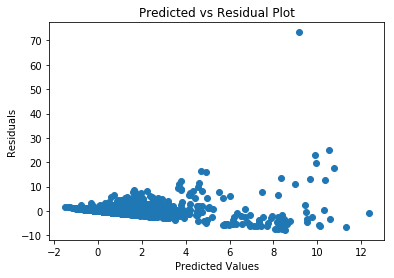

In [557]:
plt.scatter(prelim_model.fittedvalues, prelim_model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

In [558]:
len(prelim_model.resid[prelim_model.resid > 0])/len(prelim_model.resid)

0.436996336996337

***Here we see that homoscedasticity is clearly violated. Checking to see if there are the same number of points above and below the 0 line above shows that it is close, but not quite there.***

### Check Critic Count versus Global Sales

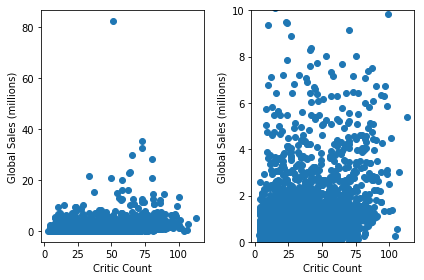

In [559]:
plt.subplot(1,2,1)
plt.scatter(df3['Critic_Count'], df3['Global_Sales'])
plt.xlabel('Critic Count')
plt.ylabel('Global Sales (millions)')

plt.subplot(1,2,2)
plt.scatter(df3['Critic_Count'], df3['Global_Sales'])
plt.ylim(0,10)
plt.xlabel('Critic Count')
plt.ylabel('Global Sales (millions)')

plt.tight_layout()
plt.show()

***We do not see anything unusual here. Critic Count vs Global Sales appears to have a linear relationship***

### Check User Count versus Global Sales

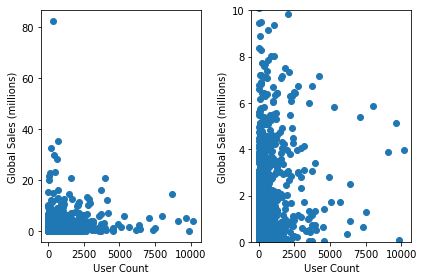

In [560]:
plt.subplot(1,2,1)
plt.scatter(df3['User_Count'], df3['Global_Sales'])
plt.xlabel('User Count')
plt.ylabel('Global Sales (millions)')

plt.subplot(1,2,2)
plt.scatter(df3['User_Count'], df3['Global_Sales'])
plt.ylim(0,10)
plt.xlabel('User Count')
plt.ylabel('Global Sales (millions)')

plt.tight_layout()
plt.show()

***Other than the outlier at the top left, User Count appears to have a linear relationship with Global Sales***

### Check Critic Score versus Global Sales

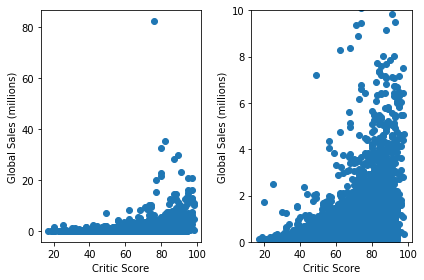

In [561]:
plt.subplot(1,2,1)
plt.scatter(df3['Critic_Score'], df3['Global_Sales'])
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')

plt.subplot(1,2,2)
plt.scatter(df3['Critic_Score'], df3['Global_Sales'])
plt.ylim(0,10)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')

plt.tight_layout()
plt.show()

***Here it appears that Critic Score vs Global Sales has a non linear relationship. We can zoom in more to make sure it has the same quadratic shape.***

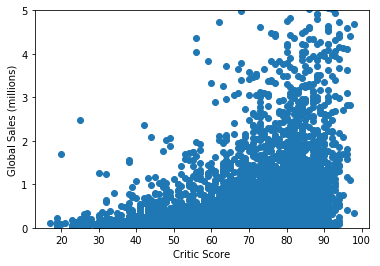

In [562]:
plt.scatter(df3['Critic_Score'], df3['Global_Sales'])
plt.ylim(0,5)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.show()

***We see the same curve zoomed in as well. We will need to add a quadratic term for Critic Score.***

### Check User Score versus Global Sales

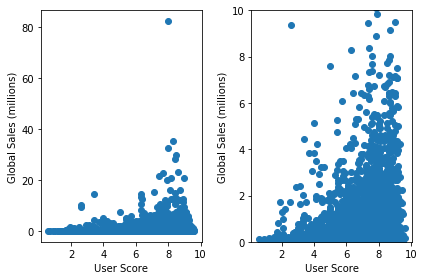

In [563]:
plt.subplot(1,2,1)
plt.scatter(df3['User_Score'], df3['Global_Sales'])
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')

plt.subplot(1,2,2)
plt.scatter(df3['User_Score'], df3['Global_Sales'])
plt.ylim(0,10)
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')

plt.tight_layout()
plt.show()

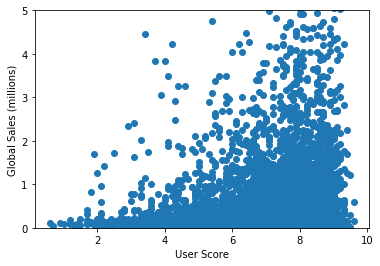

In [564]:
plt.scatter(df3['User_Score'], df3['Global_Sales'])
plt.ylim(0,5)
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')
plt.show()

***The above shows that User Score does not have a linear relationship with Global Sales either. We will add a quadratic term for this as well.***

### Add quadratic terms for Critic_Score and User_Score

In [565]:
df7['Critic_Score_Squared'] = df7['Critic_Score']**2
df7['User_Score_Squared'] = df7['User_Score']**2

In [566]:
prelim_df = df7.copy()

***Check residuals again***

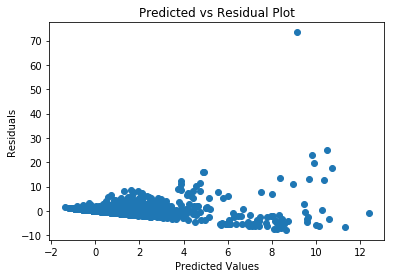

In [567]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales']
model5 = sm.OLS(y, X).fit()
plt.scatter(model5.fittedvalues, model5.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

***Here we see that adding the quadratic terms didn't fix the homoscedasticity assumption. We can try a box cox transformation.***

In [568]:
test_y = stats.boxcox(df3['Global_Sales'])
X = df7
X = sm.add_constant(X)
y = test_y[0]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     55.16
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:01:55   Log-Likelihood:                -7404.2
No. Observations:                5460   AIC:                         1.505e+04
Df Residuals:                    5338   BIC:                         1.586e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7188      0.269     -6.387      0.000      -2.246      -1.191
Critic_Score                                -0.0415      0.008     -5.221      0.000      -0.057      -0.026
Critic_Count                                 0.0110      0.005      2.057      0.040       0.001       0.021
User_Score                                   0.1489      0.061      2.422      0.015       0.028       0.269
User_Count                                   0.0004   2.93e-05     13.246      0.000       0.000       0.000
3DS                                         -0.5596      0.107     -5.217      0.000      -0.770      -0.349
DS                                          -0.3557      0.068     -5.267      0.000      -0.488      -0.223
GBA                                         -0.5242      0.085     -6.172      0.000      -0.691      -0.358
GC                                          -0.8027      0.068    -11.846      0.000      -0.936      -0.670
Other                                       -1.1374      0.122     -9.285      0.000      -1.378      -0.897
PC                                          -2.1998      0.067    -32.715      0.000      -2.332      -2.068
PS                                           0.4003      0.101      3.951      0.000       0.202       0.599
PS3                                         -0.1294      0.064     -2.016      0.044      -0.255      -0.004
PS4                                         -0.8624      0.104     -8.307      0.000      -1.066      -0.659
PSP                                         -0.4222      0.068     -6.249      0.000      -0.555      -0.290
PSV                                         -0.7465      0.116     -6.426      0.000      -0.974      -0.519
Wii                                          0.0237      0.067      0.355      0.723      -0.107       0.155
X360                                        -0.4897      0.064     -7.703      0.000      -0.614      -0.365
XB                                          -0.9201      0.057    -16.128      0.000      -1.032      -0.808
XOne                                        -0.6802      0.116     -5.870      0.000      -0.907      -0.453
Adventure                                   -0.3876      0.074     -5.243      0.000      -0.533      -0.243
Fighting                                     0.1456      0.070      2.090      0.037       0.009       0.282
Misc                                         0.2603      0.066      3.975      0.000       0.132       0.389
Puzzle                                      -0.4447      0.104     -4.262      0.000      -0.649      -0.240
Racing                                       0.0986      0.059      1.680      0.093      -0.016       0.214
Role-Playing                   

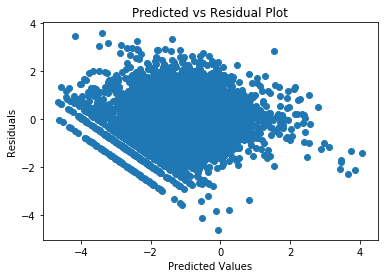

In [569]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

***We see two things with the box cox model. The r squared value is much higher, and the residuals look a bit better, but we still have the homoscedasticity assumption violated.***

***Try transforming the response with a natural log***

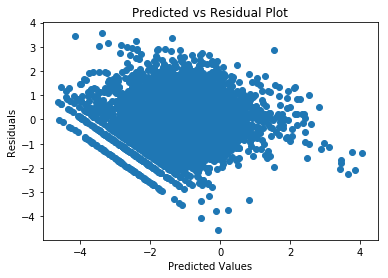

In [570]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales'].apply(m.log)
model = sm.OLS(y, X).fit()
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()


In [571]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:02:03   Log-Likelihood:                -7375.4
No. Observations:                5460   AIC:                         1.499e+04
Df Residuals:                    5338   BIC:                         1.580e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7034      0.268     -6.363      0.000      -2.228      -1.179
Critic_Score                                -0.0415      0.008     -5.241      0.000      -0.057      -0.026
Critic_Count                                 0.0106      0.005      1.995      0.046       0.000       0.021
User_Score                                   0.1483      0.061      2.425      0.015       0.028       0.268
User_Count                                   0.0004   2.92e-05     13.277      0.000       0.000       0.000
3DS                                         -0.5566      0.107     -5.216      0.000      -0.766      -0.347
DS                                          -0.3536      0.067     -5.263      0.000      -0.485      -0.222
GBA                                         -0.5216      0.084     -6.174      0.000      -0.687      -0.356
GC                                          -0.7995      0.067    -11.862      0.000      -0.932      -0.667
Other                                       -1.1317      0.122     -9.288      0.000      -1.371      -0.893
PC                                          -2.1846      0.067    -32.661      0.000      -2.316      -2.054
PS                                           0.3988      0.101      3.957      0.000       0.201       0.596
PS3                                         -0.1279      0.064     -2.003      0.045      -0.253      -0.003
PS4                                         -0.8551      0.103     -8.280      0.000      -1.058      -0.653
PSP                                         -0.4198      0.067     -6.246      0.000      -0.552      -0.288
PSV                                         -0.7424      0.116     -6.425      0.000      -0.969      -0.516
Wii                                          0.0243      0.066      0.366      0.714      -0.106       0.154
X360                                        -0.4866      0.063     -7.696      0.000      -0.611      -0.363
XB                                          -0.9158      0.057    -16.138      0.000      -1.027      -0.805
XOne                                        -0.6742      0.115     -5.849      0.000      -0.900      -0.448
Adventure                                   -0.3857      0.074     -5.245      0.000      -0.530      -0.242
Fighting                                     0.1450      0.069      2.093      0.036       0.009       0.281
Misc                                         0.2594      0.065      3.981      0.000       0.132       0.387
Puzzle                                      -0.4425      0.104     -4.264      0.000      -0.646      -0.239
Racing                                       0.0984      0.058      1.685      0.092      -0.016       0.213
Role-Playing                   

In [572]:
prelim_model = model

***We have the same r squared value and see the same shape in our residuals. Our F statistic is higher by 0.09 in the log model, so it's slightly better than the other but they're both pretty much the same.***

***Next, we can try weighted regression with the log transformed response model. Refer to https://stats.stackexchange.com/questions/97832/how-do-you-find-weights-for-weighted-least-squares-regression ***

In [573]:
#Find residuals of model 
resid1 = model.resid

In [574]:
#Find square root of absolute value of residuals
abs_residual = []

for resid in resid1:
    if resid > 0:
        abs_residual.append(resid)
    else:
        abs_residual.append(-1*resid)
        
sqrt_abs_resid = np.sqrt(abs_residual)

In [575]:
#Regress sqrt_abs_resid on our predictors to find the weights
X = df7
X = sm.add_constant(X)
y = sqrt_abs_resid
model = sm.OLS(y, X).fit()
weights_WLS = model.predict(X)

In [576]:
#Fit WLS
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales'].apply(m.log)
model= sm.WLS(y, X, weights = weights_WLS).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.542
Model:                            WLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     52.24
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:02:11   Log-Likelihood:                -7552.0
No. Observations:                5460   AIC:                         1.535e+04
Df Residuals:                    5338   BIC:                         1.615e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6495      0.276     -5.983      0.000      -2.190      -1.109
Critic_Score                                -0.0434      0.008     -5.373      0.000      -0.059      -0.028
Critic_Count                                 0.0109      0.006      1.980      0.048       0.000       0.022
User_Score                                   0.1544      0.062      2.476      0.013       0.032       0.277
User_Count                                   0.0003   2.65e-05     12.649      0.000       0.000       0.000
3DS                                         -0.5887      0.113     -5.214      0.000      -0.810      -0.367
DS                                          -0.3601      0.067     -5.342      0.000      -0.492      -0.228
GBA                                         -0.5105      0.083     -6.150      0.000      -0.673      -0.348
GC                                          -0.7861      0.069    -11.396      0.000      -0.921      -0.651
Other                                       -1.1770      0.125     -9.413      0.000      -1.422      -0.932
PC                                          -2.1936      0.066    -33.015      0.000      -2.324      -2.063
PS                                           0.3914      0.100      3.912      0.000       0.195       0.588
PS3                                         -0.1471      0.067     -2.201      0.028      -0.278      -0.016
PS4                                         -0.9036      0.104     -8.694      0.000      -1.107      -0.700
PSP                                         -0.4367      0.067     -6.472      0.000      -0.569      -0.304
PSV                                         -0.7660      0.125     -6.138      0.000      -1.011      -0.521
Wii                                          0.0179      0.067      0.267      0.789      -0.114       0.150
X360                                        -0.4997      0.066     -7.627      0.000      -0.628      -0.371
XB                                          -0.9075      0.058    -15.620      0.000      -1.021      -0.794
XOne                                        -0.7023      0.115     -6.091      0.000      -0.928      -0.476
Adventure                                   -0.3833      0.077     -4.952      0.000      -0.535      -0.232
Fighting                                     0.1508      0.073      2.077      0.038       0.008       0.293
Misc                                         0.2574      0.065      3.941      0.000       0.129       0.385
Puzzle                                      -0.4375      0.102     -4.307      0.000      -0.637      -0.238
Racing                                       0.0910      0.059      1.546      0.122      -0.024       0.206
Role-Playing                   

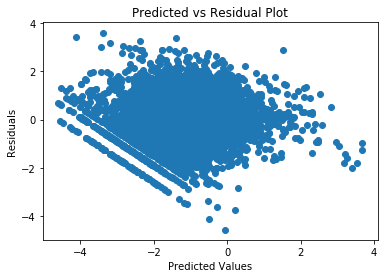

In [577]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

***Our r squared value went down and our residuals look the same. We scrap this model and go back to our previous model.***

### Our final model is: ln(Global_Sales) = b0 + b1Critic_Score + b2Critic_Count + ... + b121User_Score_Squared

***In the next step, I try to remove a combination of different variables to see the effect on the residuals. I also tried recoding the Developer, Publisher, and Platform predictors to have less categories. No matter what I tried, nothing seemed to work. I will use the current model and two others with slightly better residuals to compare predictive power. I don't recode the variables because the R squared value is better without them recoded. Since the assumptions for regression are going to be violated anyway, I go with the higher r squared models.***

### Model 2

In [578]:
df7 = prelim_df.copy()

In [579]:
#Remove Publisher
for column in df7.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'P') & (column[1] == '_'):
            del df7[column]

#Remove Developer
for column in df7.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'D') & (column[1] == '_'):
            del df7[column]

#Remove Platform
del df7['3DS']
del df7['DS']
del df7['GBA']
del df7['GC']
del df7['Other']
del df7['PC']
del df7['PS']
del df7['PS3']
del df7['PS4']
del df7['PSP']
del df7['PSV']
del df7['Wii']
del df7['X360']
del df7['XB']
del df7['XOne']

#Remove User_Score
del df7['User_Score']
del df7['User_Score_Squared']

#Remove User_Count
del df7['User_Count']

#Remove Interactions

del df7['Critic_Score_Count']
del df7['Critic_Count_Years']
del df7['Critic_Count_E']
del df7['Critic_Count_E10+']
del df7['Critic_Count_M']



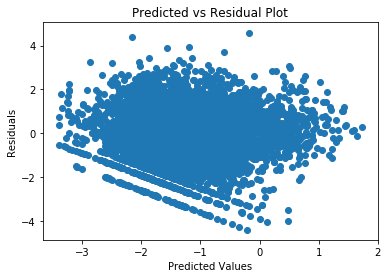

In [580]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales'].apply(m.log)
model = sm.OLS(y, X).fit()
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

In [581]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     138.5
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:02:30   Log-Likelihood:                -8610.3
No. Observations:                5460   AIC:                         1.726e+04
Df Residuals:                    5442   BIC:                         1.738e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4728      0.271     -5.442      0.000      -2.003      -0.942
Critic_Score            -0.0554      0.008     -6.808      0.000      -0.071      -0.039
Critic_Count             0.0281      0.001     28.723      0.000       0.026       0.030
Adventure               -0.5536      0.088     -6.276      0.000      -0.727      -0.381
Fighting                 0.1591      0.076      2.084      0.037       0.009       0.309
Misc                     0.3159      0.074      4.243      0.000       0.170       0.462
Puzzle                  -0.6787      0.124     -5.484      0.000      -0.921      -0.436
Racing                  -0.1280      0.065     -1.964      0.050      -0.256      -0.000
Role-Playing            -0.2185      0.058     -3.797      0.000      -0.331      -0.106
Shooter                 -0.1118      0.056     -2.007      0.045      -0.221      -0.003
Simulation              -0.0044      0.082     -0.053      0.957      -0.165       0.156
Sports                  -0.0092      0.059     -0.157      0.875      -0.124       0.106
Strategy                -1.1236      0.085    -13.286      0.000      -1.289      -0.958
E                        0.4198      0.047      8.964      0.000       0.328       0.512
E10+                     0.3271      0.053      6.117      0.000       0.222       0.432
M                        0.0057      0.048      0.118      0.906      -0.089       0.100
Years_Since_Release      0.0223      0.004      5.582      0.000       0.014       0.030
Critic_Score_Squared     0.0006   6.24e-05      9.473      0.000       0.000       0.001
==============================================================================
Omnibus:                       62.374   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.301
Skew:                          -0.238   Prob(JB):                     4.01e-15
Kurtosis:                       3.254   Cond. No.                     9.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***The residuals look better in this one. This is the "best" model I could find, trading between residuals and R squared value.***

### Our final model is: ln(Global_Sales) = b0 + b1Critic_Score + b3Adventure + ... + b17Critic_Score_Squared

In [582]:
prelim_df2 = df7.copy()
prelim_model2 = model

### Model 3

In [594]:
df7 = prelim_df.copy()

In [595]:
#Remove Publisher
for column in df7.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'P') & (column[1] == '_'):
            del df7[column]

#Remove Developer
for column in df7.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'D') & (column[1] == '_'):
            del df7[column]

#Remove User_Score
del df7['User_Score']
del df7['User_Score_Squared']

#Remove User_Count
del df7['User_Count']

#Remove Years_Since_Release
del df7['Years_Since_Release']

#Remove Critic_Count
del df7['Critic_Count']

#Remove Critic_Score
del df7['Critic_Score']
del df7['Critic_Score_Squared']

#Remove Interactions

del df7['Critic_Score_Count']
del df7['Critic_Count_Years']
del df7['Critic_Count_E']
del df7['Critic_Count_E10+']
del df7['Critic_Count_M']

In [599]:
X = df7
X = sm.add_constant(X)
y = df3['Global_Sales'].apply(m.log)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     40.39
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          7.04e-199
Time:                        07:08:08   Log-Likelihood:                -9075.7
No. Observations:                5460   AIC:                         1.821e+04
Df Residuals:                    5431   BIC:                         1.840e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1408      0.056    -20.421      0.000      -1.250      -1.031
3DS             -0.1346      0.122     -1.107      0.268      -0.373       0.104
DS              -0.1935      0.082     -2.352      0.019      -0.355      -0.032
GBA             -0.3790      0.107     -3.536      0.000      -0.589      -0.169
GC              -0.4817      0.088     -5.472      0.000      -0.654      -0.309
Other           -0.3123      0.147     -2.125      0.034      -0.601      -0.024
PC              -1.5326      0.072    -21.178      0.000      -1.674      -1.391
PS               0.2672      0.122      2.199      0.028       0.029       0.505
PS3              0.2969      0.067      4.401      0.000       0.165       0.429
PS4             -0.1736      0.102     -1.699      0.089      -0.374       0.027
PSP             -0.3908      0.085     -4.622      0.000      -0.557      -0.225
PSV             -0.7546      0.134     -5.627      0.000      -1.018      -0.492
Wii              0.1951      0.079      2.475      0.013       0.041       0.350
X360             0.1161      0.065      1.775      0.076      -0.012       0.244
XB              -0.6901      0.074     -9.298      0.000      -0.836      -0.545
XOne            -0.0997      0.123     -0.810      0.418      -0.341       0.142
Adventure       -0.7017      0.096     -7.272      0.000      -0.891      -0.513
Fighting         0.0362      0.083      0.434      0.664      -0.127       0.200
Misc             0.1970      0.082      2.414      0.016       0.037       0.357
Puzzle          -0.3887      0.137     -2.835      0.005      -0.657      -0.120
Racing           0.0175      0.072      0.244      0.808      -0.124       0.159
Role-Playing     0.0424      0.063      0.668      0.504      -0.082       0.167
Shooter          0.0573      0.061      0.942      0.346      -0.062       0.177
Simulation       0.2553      0.090      2.824      0.005       0.078       0.433
Sports           0.1119      0.065      1.716      0.086      -0.016       0.240
Strategy        -0.4594      0.095     -4.838      0.000      -0.646      -0.273
E                0.2047      0.053      3.839      0.000       0.100       0.309
E10+            -0.0207      0.059     -0.349      0.727      -0.137       0.096
M                0.3839      0.052      7.363      0.000       0.282       0.486
==============================================================================
Omnibus:                       24.132   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.320
Skew:                           0.162   Prob(JB):                     5.24e-06
Kurtosis:                       3.049   Cond. No.                         12.9
==============================================================================

Warnings:
[1] St

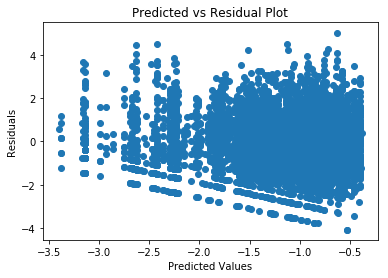

In [601]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

***Residuals don't really improve from Model 2 and our r squared value has sunk a lot. The residuals have a different shape here compared to the previous two models, but still has non constant variance.***

### Our final model is: ln(Global_Sales) = b0 + b1(3DS) + b2DS + ... + b28M

In [602]:
prelim_df3 = df7.copy()
prelim_model3 = model

### Next, we need to use our test set to match the data frame we have for our models

In [603]:
df3 = df.iloc[X_test.index, :]

In [604]:
df3['Publisher'] = 'P_' + df3['Publisher']

C:\Users\Skywind\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [605]:
df3['Developer'] = 'D_' + df3['Developer']

C:\Users\Skywind\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [606]:
df_Platform = pd.get_dummies(df3['Platform'])
del df_Platform['PS2'] #reference group
df_Genre = pd.get_dummies(df3['Genre'])
del df_Genre['Action'] #reference group
df_Publisher = pd.get_dummies(df3['Publisher'])
del df_Publisher['P_Other'] #reference group
df_Rating = pd.get_dummies(df3['Rating'])
del df_Rating['T'] #reference group
df_Developer = pd.get_dummies(df3['Developer'])
del df_Developer['D_Other'] #reference group
df4 = df3.copy()

df4 = pd.concat([df4, df_Platform, df_Genre, df_Publisher, df_Rating, df_Developer], axis=1)

In [607]:
del df4['Name']
del df4['Dev_same_publisher']
del df4['Years_Since_Release']
del df4['Good']
del df4['Global_Sales']
del df4['Platform']
del df4['Genre']
del df4['Publisher']
del df4['Rating']
del df4['Developer']
del df4['NA_Sales']
del df4['JP_Sales']
del df4['EU_Sales']
del df4['Other_Sales']

In [608]:
df4['Years_Since_Release'] = df3['Years_Since_Release']

In [609]:
df4['Critic_Score_Count'] = df4['Critic_Score']*df4['Critic_Count']

In [610]:
df4['Critic_Count_Years'] = df4['Critic_Count']*df4['Years_Since_Release']

In [611]:
df4['Critic_Count_E'] = df4['Critic_Count']*df4['E']
df4['Critic_Count_E10+'] = df4['Critic_Count']*df4['E10+']
df4['Critic_Count_M'] = df4['Critic_Count']*df4['M']

In [612]:
df4['Critic_Score_Squared'] = df4['Critic_Score']**2
df4['User_Score_Squared'] = df4['User_Score']**2

In [613]:
const_col = np.repeat(1,len(df4))

In [614]:
df4.insert(0, 'const', const_col)

### Model 1 Prediction

***First, I will create a function that will allow me to make predictions on the test set***

In [615]:
def model_predictions(model, df):

    predictions = []
    
    for j in range(len(df4)):
        
        prediction = 0
    
        for i in range(len(df.columns)):
            
            prediction+= model.params[i] * df.iloc[j, i]
            
        predictions.append(prediction)
             
    return(predictions)

In [636]:
y_predict = model_predictions(prelim_model, df4)

***Create function to compute the difference between the actual global sales value and the predicted global sales value***

In [617]:
def predict_test_diff(prediction, actual):

    prediction_differences = []

    for i in range(len(prediction)):
        
        if prediction[i] <= 0:
            prediction_difference = actual.values[i] - 1 * prediction[i]
        else:
            prediction_difference = actual.values[i] - prediction[i]
        
        if prediction_difference < 0:
            prediction_difference = prediction_difference * -1
        prediction_differences.append(prediction_difference)
    
    return(prediction_differences)

***We use the exponential function on our predicted values since we originally used a natural log transformation. We do this so that the scale matches our y_test data.***

In [637]:
model1_differences = predict_test_diff(np.exp(y_predict), y_test)

In [638]:
sum(model1_differences)

705.6632273935204

### Model 2 Prediction

In [639]:
df5 = df4.copy()

In [640]:
#Remove Publisher
for column in df5.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'P') & (column[1] == '_'):
            del df5[column]

#Remove Developer
for column in df5.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'D') & (column[1] == '_'):
            del df5[column]

#Remove Platform
del df5['3DS']
del df5['DS']
del df5['GBA']
del df5['GC']
del df5['Other']
del df5['PC']
del df5['PS']
del df5['PS3']
del df5['PS4']
del df5['PSP']
del df5['PSV']
del df5['Wii']
del df5['X360']
del df5['XB']
del df5['XOne']

#Remove User_Score
del df5['User_Score']
del df5['User_Score_Squared']

#Remove User_Count
del df5['User_Count']

#Remove Interactions

del df5['Critic_Score_Count']
del df5['Critic_Count_Years']
del df5['Critic_Count_E']
del df5['Critic_Count_E10+']
del df5['Critic_Count_M']

In [641]:
y_predict = model_predictions(prelim_model2, df5)

In [642]:
model2_differences = predict_test_diff(np.exp(y_predict), y_test)

In [643]:
sum(model2_differences)

765.38165171997537

### Model 3 Prediction

In [644]:
df5 = df4.copy()

In [645]:
#Remove Publisher
for column in df5.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'P') & (column[1] == '_'):
            del df5[column]

#Remove Developer
for column in df5.columns.values:
    if len(column) >= 3:
        
        if (column[0] == 'D') & (column[1] == '_'):
            del df5[column]

#Remove User_Score
del df5['User_Score']
del df5['User_Score_Squared']

#Remove User_Count
del df5['User_Count']

#Remove Years_Since_Release
del df5['Years_Since_Release']

#Remove Critic_Count
del df5['Critic_Count']

#Remove Critic_Score
del df5['Critic_Score']
del df5['Critic_Score_Squared']

#Remove Interactions

del df5['Critic_Score_Count']
del df5['Critic_Count_Years']
del df5['Critic_Count_E']
del df5['Critic_Count_E10+']
del df5['Critic_Count_M']

In [646]:
y_predict = model_predictions(prelim_model3, df5)

In [647]:
model3_differences = predict_test_diff(np.exp(y_predict), y_test)

In [648]:
sum(model3_differences)

850.12650916235066

***We see somewhat of a difference between the three models. The "best" statistical model I could find did not have the best overall predictive power. Model 1 had the highest accuracy because it had a higher R squared value.***